<a href="https://colab.research.google.com/github/borhanur-rahman/AI_Assignments/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Equation: y = 5x + 10
Test MAE: 0.04847114533185959
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


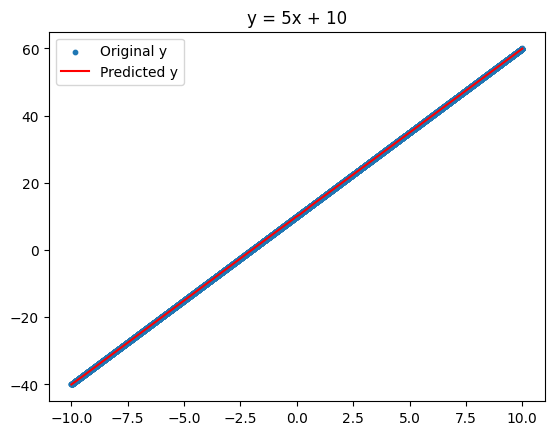


Equation: y = 3x^2 + 5x + 10
Test MAE: 0.28162920475006104
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


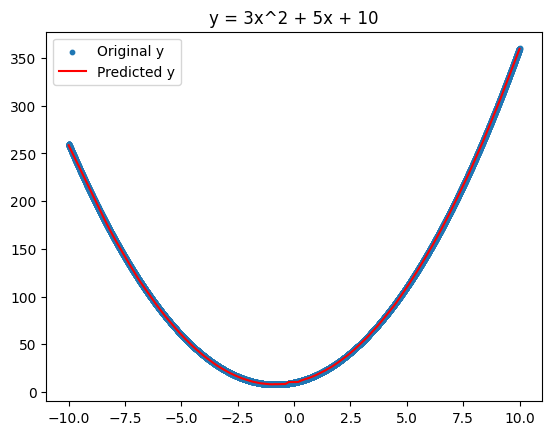


Equation: y = 4x^3 + 3x^2 + 5x + 10
Test MAE: 17.73688316345215
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


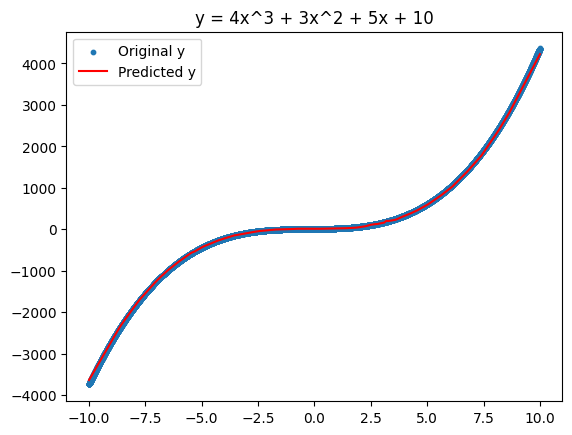

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model



x = np.linspace(-10, 10, 10000)
x = x.reshape(-1, 1)

y1 = 5*x + 10
y2 = 3*(x**2) + 5*x + 10
y3 = 4*(x**3) + 3*(x**2) + 5*x + 10




def split_data(x, y):
    X_train, X_temp, y_train, y_temp = train_test_split(
        x, y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test




def build_model():

    inputs = Input(shape=(1,), name='input_layer')

    x = Dense(8, activation='relu', name='hidden1')(inputs)
    x = Dense(16, activation='relu', name='hidden2')(x)
    x = Dense(32, activation='relu', name='hidden3')(x)
    x = Dense(64, activation='relu', name='hidden4')(x)
    x = Dense(128, activation='relu', name='hidden5')(x)
    x = Dense(64, activation='relu', name='hidden6')(x)
    x = Dense(32, activation='relu', name='hidden7')(x)
    x = Dense(16, activation='relu', name='hidden8')(x)

    outputs = Dense(1, activation='linear', name='output_layer')(x)

    model = Model(inputs=inputs, outputs=outputs, name="Deep_FCFNN_Model")

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model




def train_and_plot(x, y, equation_name):

    X_train, X_val, X_test, y_train, y_val, y_test = split_data(x, y)

    model = build_model()

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        verbose=0
    )

    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    print(f"\nEquation: {equation_name}")
    print("Test MAE:", test_mae)

    y_pred = model.predict(x)

    plt.figure()
    plt.scatter(x, y, label="Original y", s=10)
    plt.plot(x, y_pred, color='red', label="Predicted y")
    plt.title(equation_name)
    plt.legend()
    plt.show()




train_and_plot(x, y1, "y = 5x + 10")
train_and_plot(x, y2, "y = 3x^2 + 5x + 10")
train_and_plot(x, y3, "y = 4x^3 + 3x^2 + 5x + 10")